# Time-varying field

In this tutorial, we introduce how a time-dependent external magnetic field can be defined in energy equation. We start by importing the modules we are going to use:

In [13]:
import oommfc as mc
import discretisedfield as df
import micromagneticmodel as mm

For the sample, we choose a one-dimensional chain of magnetic moments.

In [14]:
p1 = (-10e-9, 0, 0)
p2 = (10e-9, 1e-9, 1e-9)
cell = (1e-9, 1e-9, 1e-9)
region = df.Region(p1=p1, p2=p2)
mesh = df.Mesh(region=region, cell=cell)

The mesh is:

In [15]:
mesh.k3d()

Output()

Now, we can define the system object and add a time-dependent sine-wave field to our energy equation. We need to pass:

- Field `H` which is multiplied by time-dependent function at each time step,
- wave shape `wave='sin'`
- frequency `f`, and
- time shift `t0`.

Accordingly, the time-dependent Zeeman field is then:

$$\mathbf{H}(t) = \mathbf{H}_\text{amp}\sin(2\pi f (t-t_{0}))$$

In [26]:
system = mm.System(name='time_dependent_field')

system.energy = mm.Exchange(A=1.6e-11) + mm.Zeeman(H=(1e6, 2e6, 3e6), wave='sin', f=1e9, t0=1e-9)
system.dynamics = mm.Precession(gamma0=mm.consts.gamma0) + mm.Damping(alpha=1e-5)

system.m = df.Field(mesh, dim=3, value=(0, 0, 1), norm=1.1e6)

Now, we can run the simulation using `TimeDriver`:

In [27]:
td = mc.TimeDriver()
td.drive(system, t=5e-9, n=200)

Running OOMMF (ExeOOMMFRunner) [2020/07/02 14:25]... (4.7 s)


In the system table, there are columns with field values:

In [28]:
system.table.data

,E,E_calc_count,max_dm/dt,dE/dt,delta_E,E_exchange,max_spin_ang_exchange,max_spin_ang_exchange,max_spin_ang_exchange,E_zeeman,...,By_zeeman,Bz_zeeman,iteration,stage_iteration,stage,mx,my,mz,last_time_step,t
0,-1.297563e-20,25.0,4.434031e+03,-5.147568e-10,-1.812700e-21,0.0,0.0,0.0,0.0,-1.297563e-20,...,3.931627e+02,5.897440e+02,3.0,3.0,0.0,0.758989,0.183653,0.624666,3.515634e-12,2.500000e-11
1,-2.562001e-20,56.0,8.766104e+03,-4.954602e-10,-1.204656e-21,0.0,0.0,0.0,0.0,-2.562001e-20,...,7.766444e+02,1.164967e+03,9.0,5.0,1.0,0.090633,-0.038564,0.995137,2.425770e-12,5.000000e-11
2,-3.759093e-20,105.0,1.290846e+04,-4.636140e-10,-1.221901e-21,0.0,0.0,0.0,0.0,-3.759093e-20,...,1.141003e+03,1.711504e+03,17.0,7.0,2.0,0.784284,0.261449,0.562622,2.631440e-12,7.500000e-11
3,-4.863542e-20,184.0,1.673341e+04,-4.207088e-10,-6.112468e-22,0.0,0.0,0.0,0.0,-4.863542e-20,...,1.477265e+03,2.215898e+03,30.0,12.0,3.0,0.015202,-0.010857,0.999825,1.449728e-12,1.000000e-10
4,-5.848036e-20,299.0,2.014752e+04,-3.675974e-10,-2.915541e-22,0.0,0.0,0.0,0.0,-5.848036e-20,...,1.777153e+03,2.665730e+03,48.0,17.0,4.0,0.497085,-0.051994,0.866143,7.913664e-13,1.250000e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,4.436379e-20,20614.0,1.906705e+04,-3.837992e-10,-2.268306e-22,0.0,0.0,0.0,0.0,4.436379e-20,...,-1.477265e+03,-2.215898e+03,3450.0,15.0,195.0,-0.020176,-0.114665,0.993199,5.918021e-13,4.900000e-09
196,3.422674e-20,20687.0,1.474584e+04,-4.221479e-10,-5.046823e-22,0.0,0.0,0.0,0.0,3.422674e-20,...,-1.141003e+03,-1.711504e+03,3463.0,12.0,196.0,0.848044,0.209072,0.486939,1.197700e-12,4.925000e-09
197,2.328011e-20,20742.0,1.004530e+04,-4.502211e-10,-1.083878e-21,0.0,0.0,0.0,0.0,2.328011e-20,...,-7.766444e+02,-1.164967e+03,3473.0,9.0,197.0,0.063640,-0.149399,0.986727,2.412896e-12,4.950000e-09
198,1.178128e-20,20779.0,5.087140e+03,-4.673789e-10,-2.358762e-21,0.0,0.0,0.0,0.0,1.178128e-20,...,-3.931627e+02,-5.897440e+02,3480.0,6.0,198.0,0.822805,0.116178,0.556322,5.059389e-12,4.975000e-09


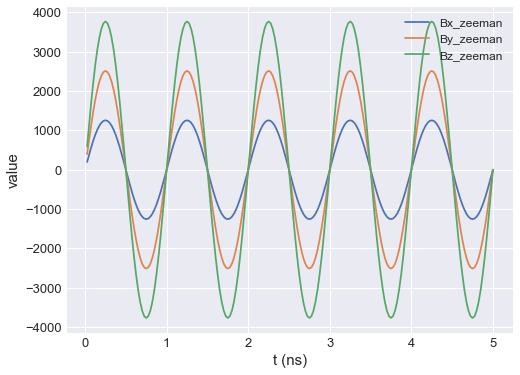

In [29]:
system.table.mpl(yaxis=['Bx_zeeman', 'By_zeeman', 'Bz_zeeman'])

Similarly, we can define a cardinal sine wave ("sinc pulse"). We need to pass:

- Field `H` which is multiplied by time-dependent function at each time step,
- wave shape `wave='sinc'`
- cut-off frequency `f`, and
- time shift `t0`.

Accordingly, the time-dependent Zeeman field is then:

$$\mathbf{H}(t) = \mathbf{H}_\text{amp}\text{sinc}(2\pi f_{c} (t-t_{0})) = \mathbf{H}_\text{amp}\frac{\text{sinc}(2\pi f_{c} (t-t_{0}))}{2\pi f_{c} (t-t_{0})}$$

Running OOMMF (ExeOOMMFRunner) [2020/07/02 14:30]... (3.6 s)


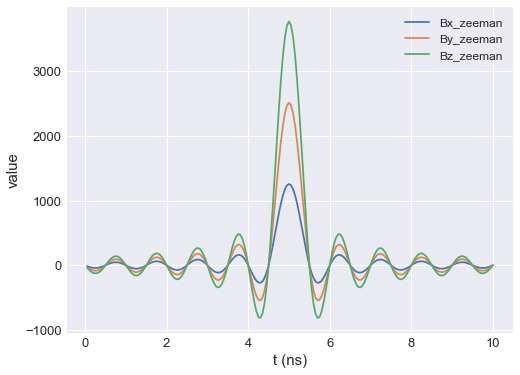

In [31]:
system = mm.System(name='time_dependent_field')

system.energy = (mm.Exchange(A=1.6e-11) +
                 mm.Zeeman(H=(1e6, 2e6, 3e6), wave='sinc', f=1e9, t0=5e-9))
system.dynamics = mm.Precession(gamma0=mm.consts.gamma0) + mm.Damping(alpha=1e-5)

system.m = df.Field(mesh, dim=3, value=(0, 0, 1), norm=1.1e6)

td = mc.TimeDriver()
td.drive(system, t=10e-9, n=200)

system.table.mpl(yaxis=['Bx_zeeman', 'By_zeeman', 'Bz_zeeman'])